In [1]:
# https://panel.holoviz.org/reference/panes/Matplotlib.html
import warnings
warnings.filterwarnings('ignore')

import panel as pn
pn.extension('ipywidgets')

import numpy as np

from matplotlib.figure import Figure
from matplotlib import cm
from matplotlib.backends.backend_agg import FigureCanvas  # not needed for mpl >= 3.1
from mpl_toolkits.mplot3d import axes3d

In [2]:
Y, X = np.mgrid[-3:3:100j, -3:3:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

In [3]:
fig0 = Figure(figsize=(8, 6))
ax0 = fig0.subplots()
FigureCanvas(fig0)  # not needed for mpl >= 3.1

In [4]:
strm = ax0.streamplot(X, Y, U, V, color=U, linewidth=2, cmap=cm.autumn)
fig0.colorbar(strm.lines)

Matplotlib(Figure, height=432, width=576)
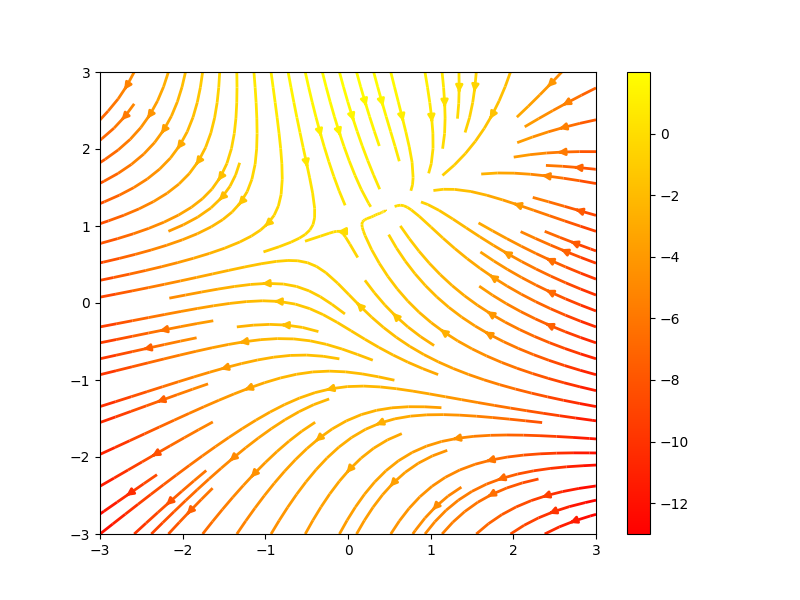

In [5]:
mpl_pane = pn.pane.Matplotlib(fig0, dpi=144)
mpl_pane

In [6]:
strm.lines.set_cmap(cm.viridis)

mpl_pane.param.trigger('object')

In [7]:
fig3d = Figure(figsize=(8, 6))
ax = fig3d.add_subplot(111, projection='3d')
FigureCanvas(fig3d)  # not needed for mpl >= 3.1

X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

mpl_pane.object = fig3d

Matplotlib(Figure, height=432, sizing_mode='scale_both', width=576)
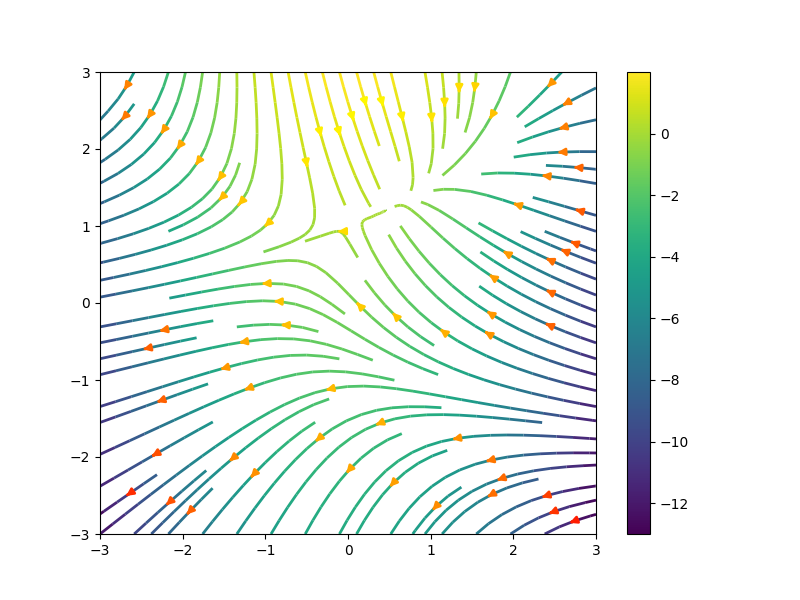

In [8]:
pn.pane.Matplotlib(fig0, format='svg', sizing_mode='scale_both')

In [9]:
fig = Figure(figsize=(8, 6))
ax = fig.add_subplot(111)

dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

cf = ax.contourf(x + dx/2., y + dy/2., z)
fig.colorbar(cf, ax=ax)

pn.pane.Matplotlib(fig, interactive=True, dpi=72)

Matplotlib(Figure, dpi=72, height=216, interactive=True, width=288)

Row
    [0] WidgetBox(name='Layout', width=300)
        [0] StaticText(value='<b>Layout</b>')
        [1] TextInput(disabled=True, name='Name', value='Matplotlib00101')
        [2] LiteralInput(name='Align', serializer='json', value='start')
        [3] LiteralInput(name='Aspect ratio', serializer='json')
        [4] LiteralInput(name='Background', serializer='json')
        [5] ListInput(name='Css classes', serializer='json', type=<class 'list'>)
        [6] IntInput(name='Min width', start=0)
        [7] IntInput(name='Min height', start=0)
        [8] IntInput(name='Max width', start=0)
        [9] IntInput(name='Max height', start=0)
        [10] LiteralInput(name='Margin', serializer='json', value=5)
        [11] Select(name='Width policy', options=OrderedDict([('auto', ...]), value='auto')
        [12] Select(name='Height policy', options=OrderedDict([('auto', ...]), value='auto')
        [13] Select(name='Sizing mode', options=OrderedDict([('fixed', ...]))
        [14] Checkbox(name='Visible', value=True)
    [1] Matplotlib(Figure, height=432, width=576)
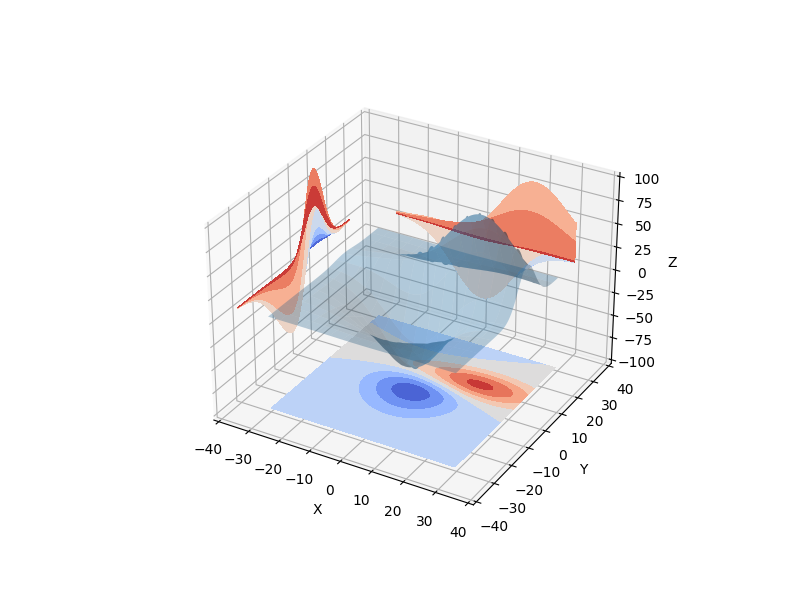

In [10]:
pn.Row(mpl_pane.controls(jslink=True), mpl_pane)